In [1]:
!pip install missingno
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df_train = pd.read_csv('CS98XClassificationTrain.csv')
df_test = pd.read_csv('CS98XClassificationTest.csv')

In [3]:
df_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
df_test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


<AxesSubplot:>

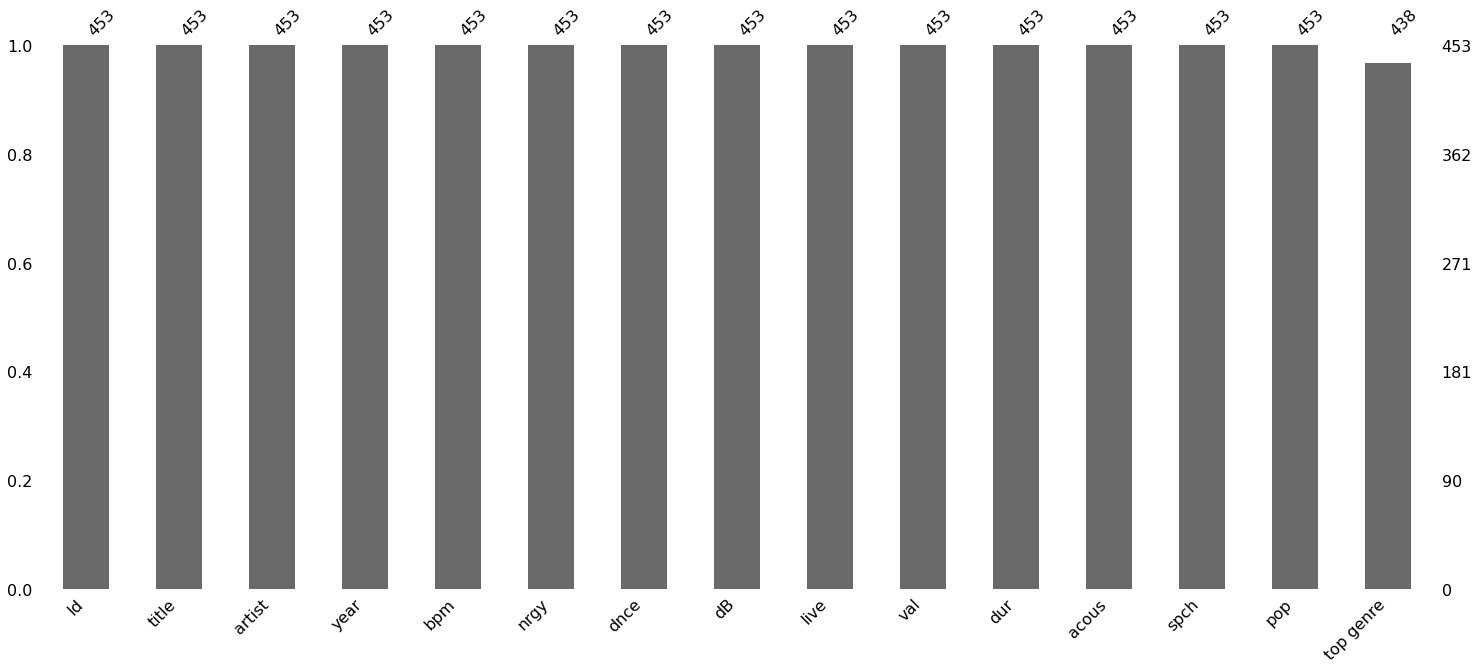

In [7]:
msno.bar(df_train)

In [8]:
df_train.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [9]:
df_test.isna().sum()

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [10]:
df_train.fillna(df_train['top genre'].mode()[0],inplace=True)

In [11]:
df_train.isna().sum()

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

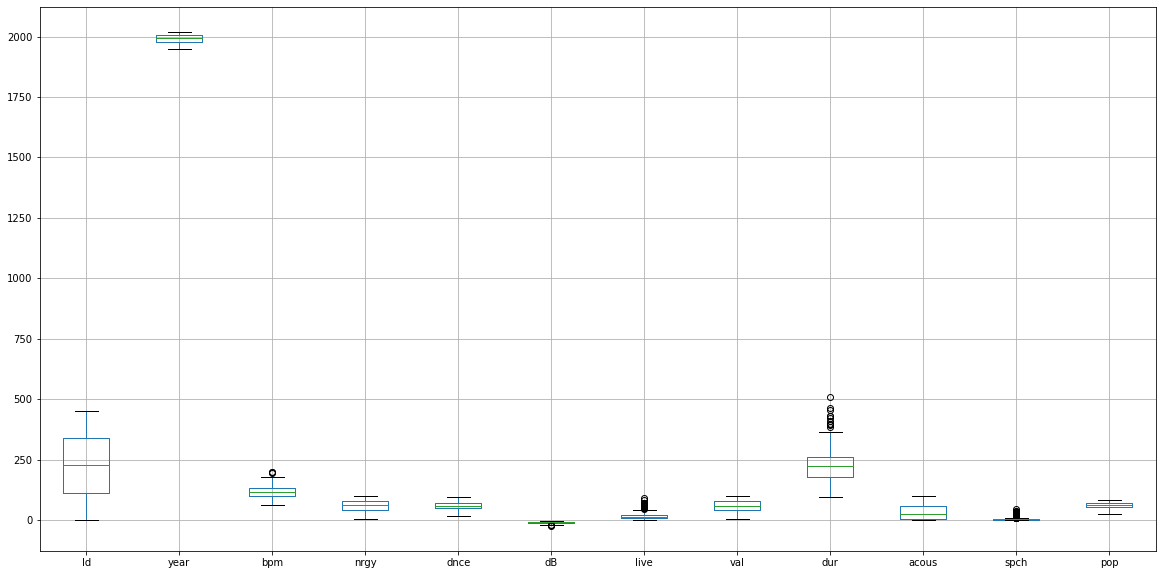

In [12]:
plt.figure(figsize=(20,10))
df_train.boxplot()
plt.show()

In [13]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_bound =  Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    return lower_bound, upper_bound

In [14]:
des_columns = ["bpm",'dnce',"dB","dur","spch","pop","live"]

In [15]:
for column in des_columns:
    lr,ur = remove_outliers(df_train[column])
    df_train[column] =np.where(df_train[column]>ur, ur, df_train[column])
    df_train[column] =np.where(df_train[column]<lr, lr, df_train[column])

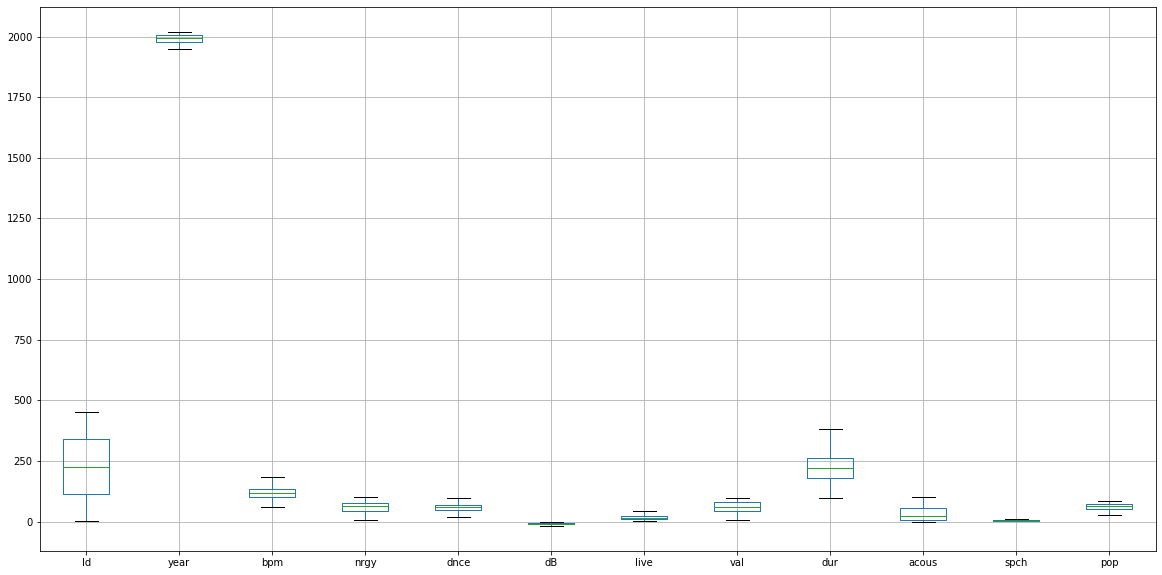

In [16]:
plt.figure(figsize=(20,10))
df_train.boxplot()
plt.show()

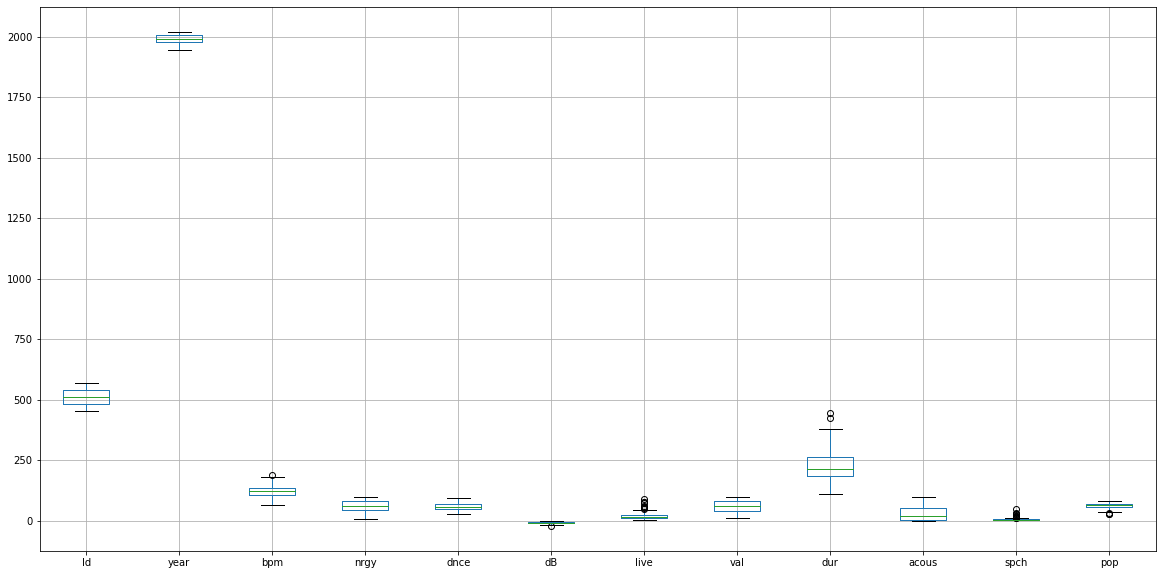

In [17]:
plt.figure(figsize=(20,10))
df_test.boxplot()
plt.show()

In [18]:
for column in des_columns:
    lr,ur = remove_outliers(df_test[column])
    df_test[column] =np.where(df_test[column]>ur, ur, df_test[column])
    df_test[column] =np.where(df_test[column]<lr, lr, df_test[column])

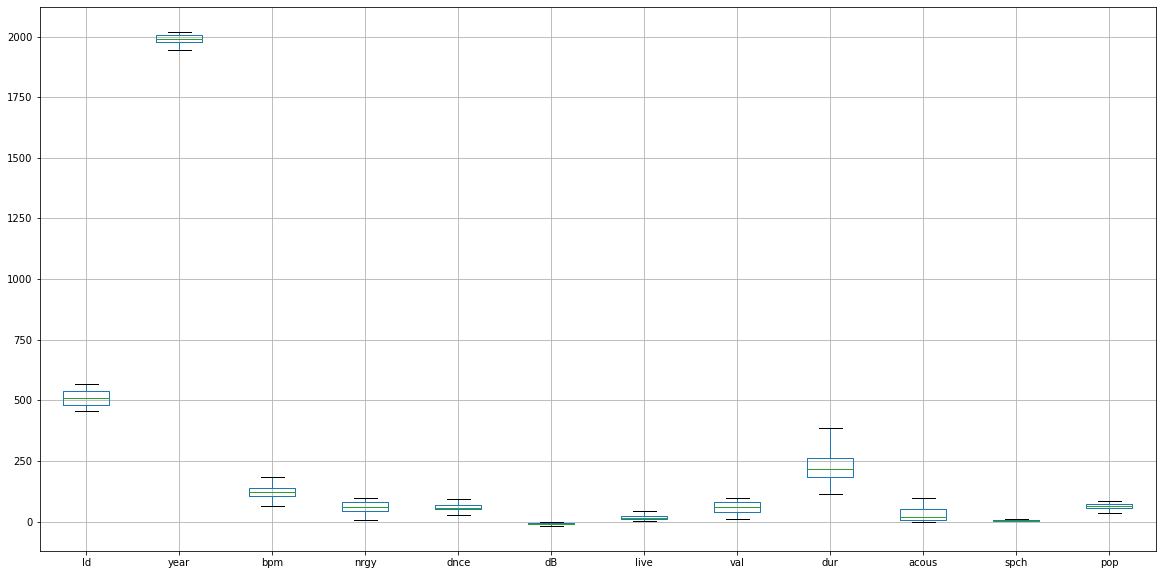

In [19]:
plt.figure(figsize=(20,10))
df_test.boxplot()
plt.show()

In [20]:
df_train = df_train.drop('Id',axis=1)
df_train = df_train.drop('title',axis=1)
df_train = df_train.drop('year',axis=1)
#df_train = df_train.drop('artist',axis=1)

df_test = df_test.drop('Id',axis=1)
df_test = df_test.drop('title',axis=1)
df_test = df_test.drop('year',axis=1)
#df_test = df_test.drop('artist',axis=1)

In [21]:
df_train.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,Connie Francis,107.0,31,45.0,-8.0,13.0,28,150.0,75,3.0,44.0,adult standards
1,The Teddy Bears,114.0,44,53.0,-8.0,13.0,47,139.0,49,3.0,37.0,adult standards
2,Bee Gees,105.0,36,63.0,-9.0,13.0,67,245.0,11,3.0,77.0,adult standards
3,Barbra Streisand,170.0,28,47.0,-16.0,13.0,33,232.0,25,3.0,67.0,adult standards
4,Elton John,121.0,47,56.0,-8.0,15.0,40,193.0,45,3.0,63.0,glam rock


<AxesSubplot:xlabel='bpm', ylabel='Density'>

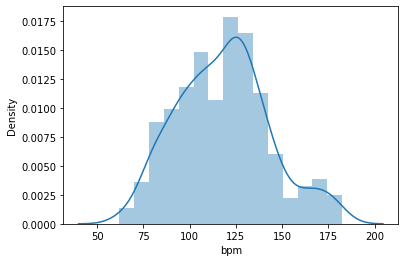

In [22]:
sns.distplot(df_train['bpm'])

<AxesSubplot:xlabel='nrgy', ylabel='Density'>

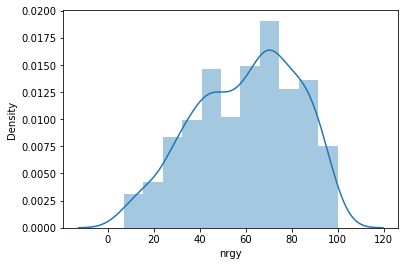

In [23]:
sns.distplot(df_train['nrgy'])

<AxesSubplot:xlabel='dnce', ylabel='Density'>

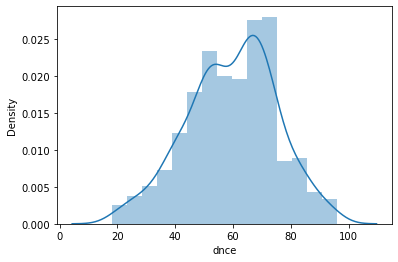

In [24]:
sns.distplot(df_train['dnce'])

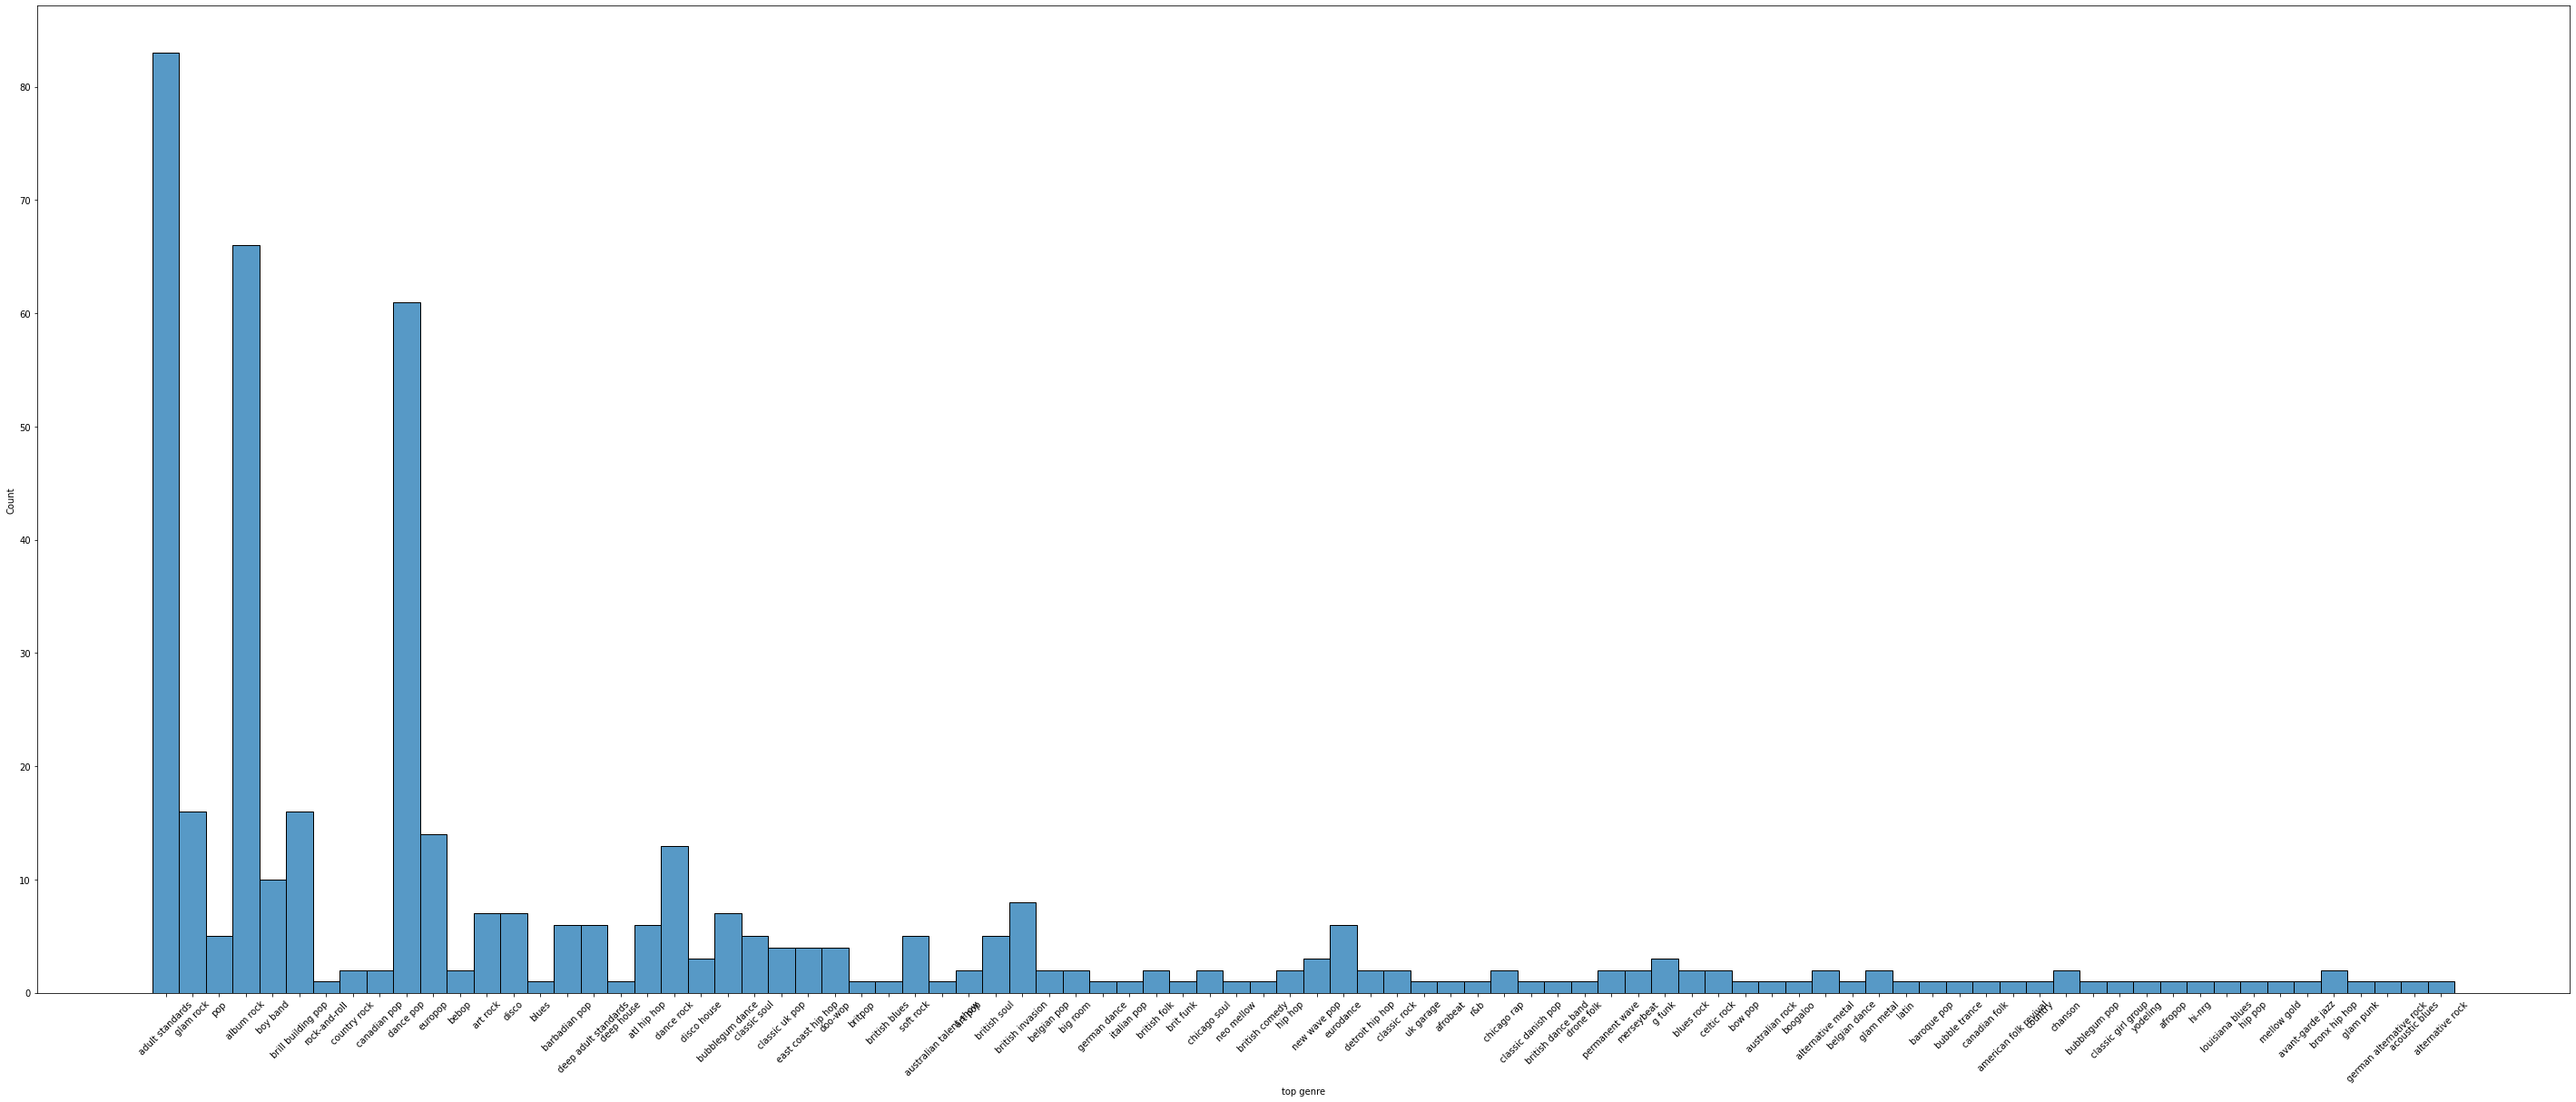

In [25]:
plt.figure(figsize=(50,20))
sns.histplot(df_train['top genre'])
plt.xticks(rotation=45)
plt.show()

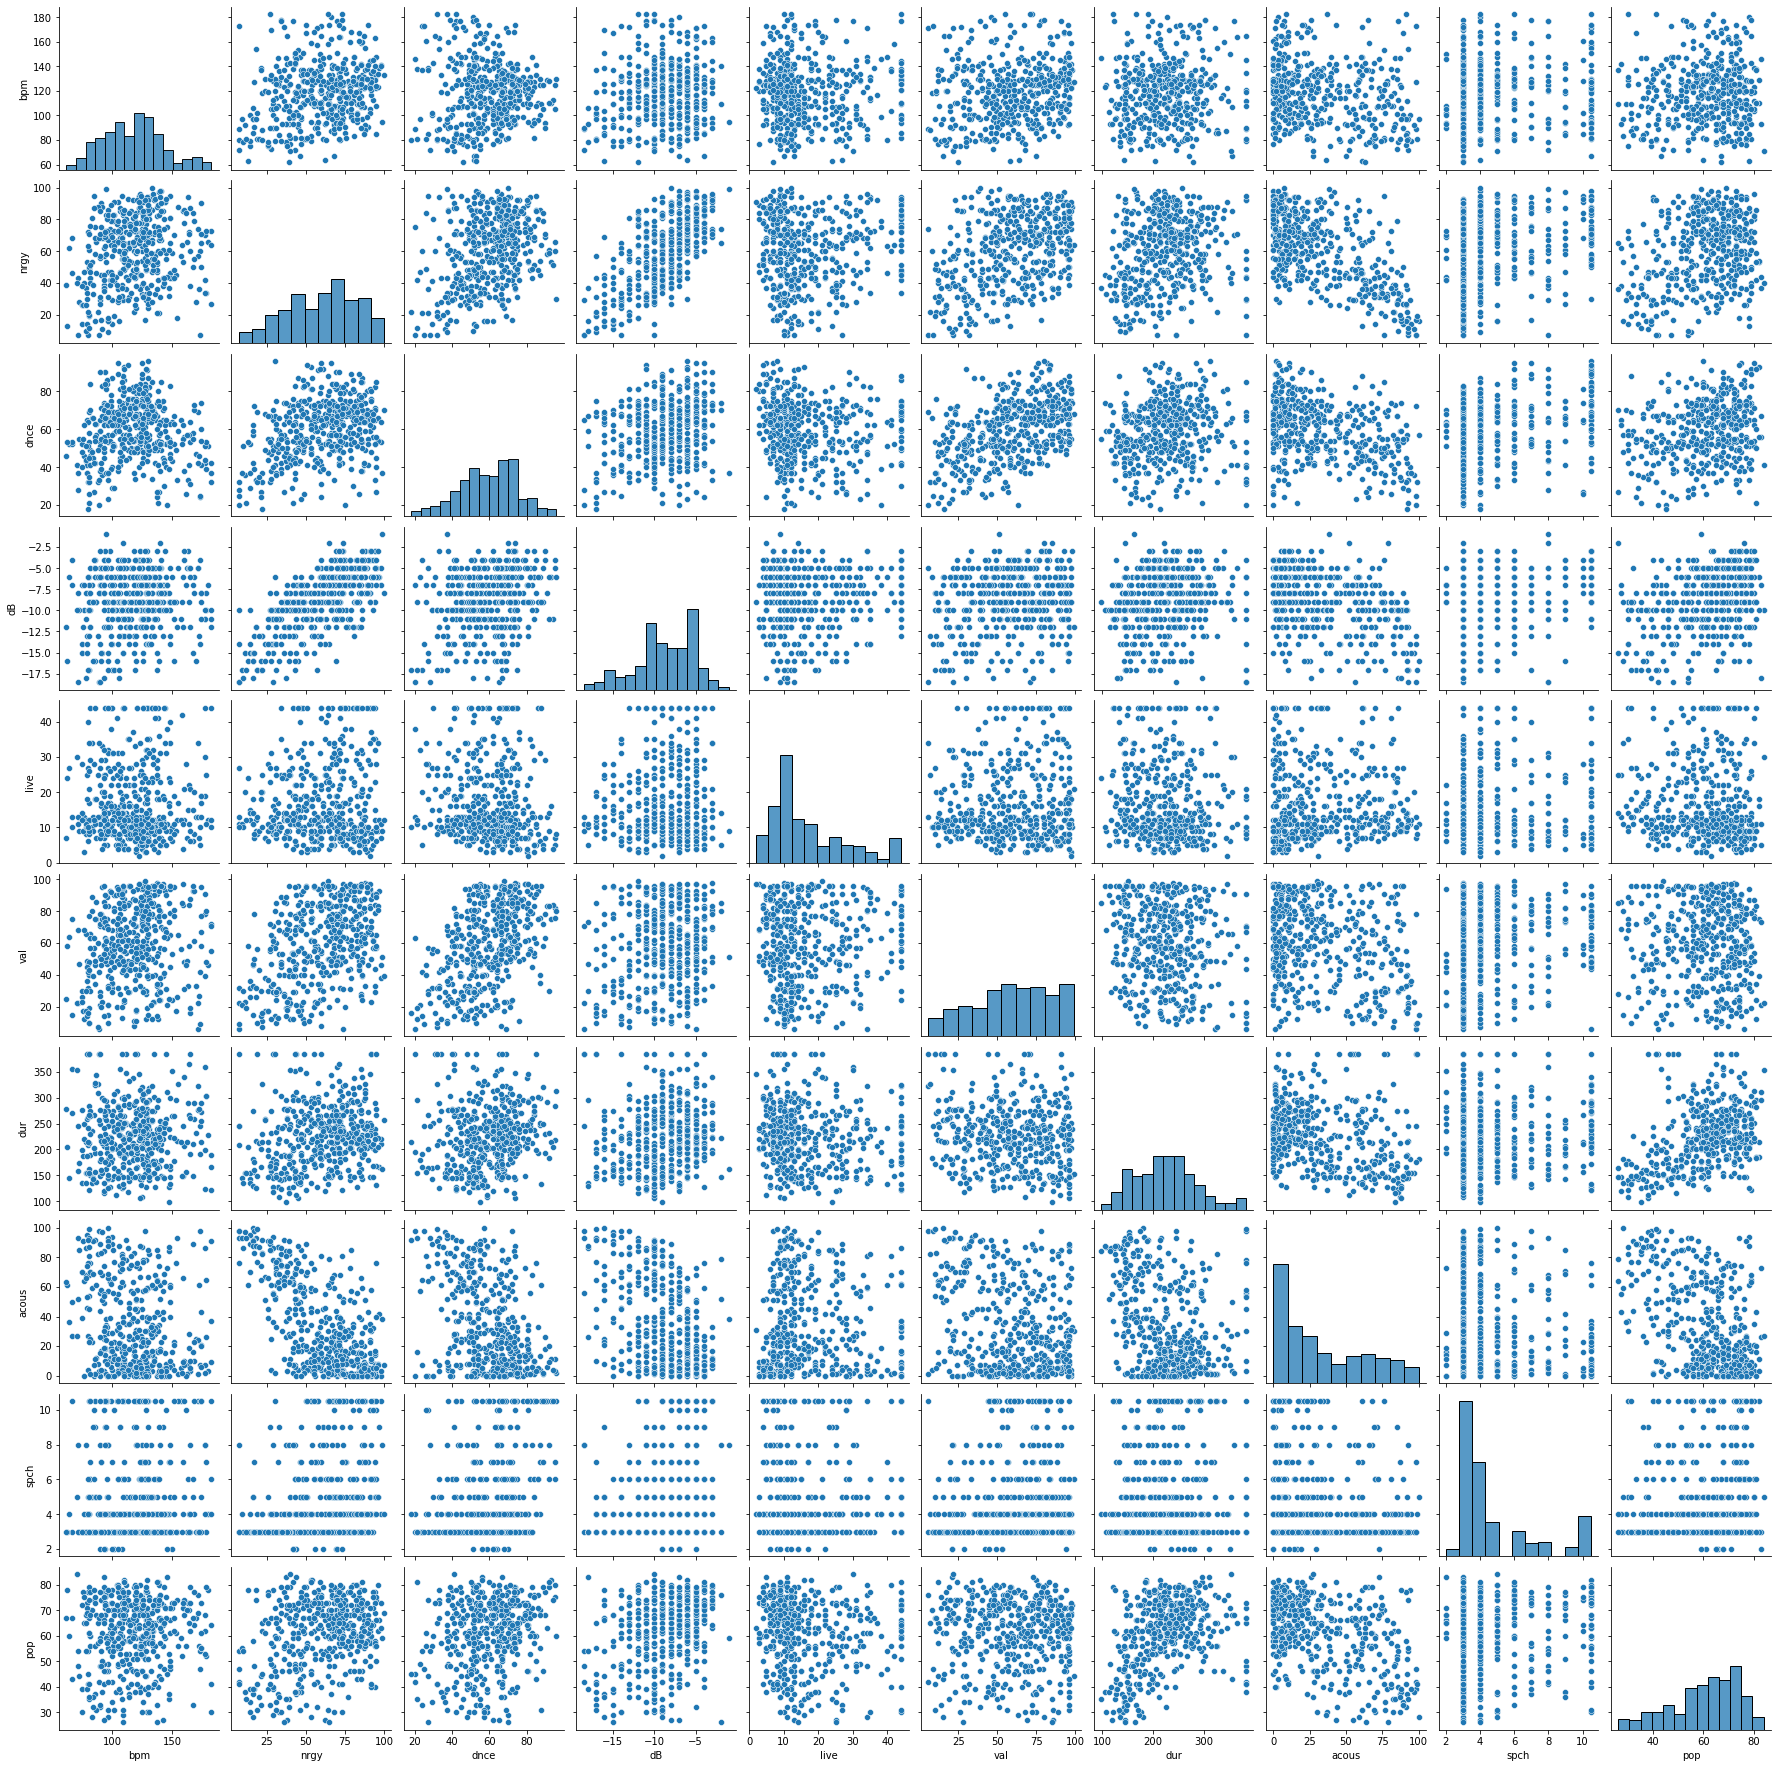

In [26]:
sns.pairplot(df_train)

df_train['artist'].shape

In [27]:
df_test.shape

(113, 11)

train_artist = pd.DataFrame(df_train['artist'])
test_artist = pd.DataFrame(df_test['artist'])

df = train_artist.merge(test_artist, how = 'inner' ,indicator=False)
df_train_ar = df_train
df_train_ar = df_train_ar.drop('artist',axis=1)
df_train_prepared = df_train_ar.join(df,how='left', lsuffix='_left', rsuffix='_right')


df_train_prepared.isna().sum()

df_train_prepared.fillna(df_train['artist'].mode()[0],inplace=True)
df_train_prepared.head()


for index, train_row in train_artist.iterrows():
    for index, test_row in test_artist.iterrows():
        if(test_row['artist'] != train_row['artist']  ):
            new_df.append(train_row['artist'])
            break
df = pd.DataFrame(new_df)

df.head()

In [28]:
le = LabelEncoder()
df_train['artist'] = le.fit_transform(df_train['artist'])

df_train.isna().sum()

df_train['artist'].value_counts()

a_encoded, a_categories = df_train['artist'].factorize()
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
a_hot = oh.fit_transform(a_encoded.reshape(-1,1))
df_train_en= df_train.drop('artist',axis=1)

df_train_attri_1 = ['artist']
df_train_num_attri_1 = list(df_train_en)
enc_data = pd.DataFrame(a_hot.toarray())
enc_data.columns = a_categories
print(enc_data.columns)
enc_data.index = df_train.index
print(enc_data.index)

df_train_new = df_train_en.join(enc_data,how='left', lsuffix='_left', rsuffix='_right')

In [29]:
df_train.shape

(453, 12)

In [30]:
X = df_train.drop('top genre',axis=1)
y = df_train['top genre']
X.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,56,107.0,31,45.0,-8.0,13.0,28,150.0,75,3.0,44.0
1,306,114.0,44,53.0,-8.0,13.0,47,139.0,49,3.0,37.0
2,20,105.0,36,63.0,-9.0,13.0,67,245.0,11,3.0,77.0
3,19,170.0,28,47.0,-16.0,13.0,33,232.0,25,3.0,67.0
4,94,121.0,47,56.0,-8.0,15.0,40,193.0,45,3.0,63.0


In [31]:
from sklearn.preprocessing import normalize
X = normalize(X)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

In [33]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [34]:
pca_lr = PCA(n_components=11)
log_reg = LogisticRegression(multi_class='ovr')
X_train_pca = pca_lr.fit_transform(X_train_ST)
X_test_pca = pca_lr.transform(X_test_ST)
log_reg.fit(X_train_pca,y_train)

LogisticRegression(multi_class='ovr')

In [35]:
y_pred_log = log_reg.predict(X_test_pca)

In [36]:
accuracy_score(y_test,y_pred_log)

0.34782608695652173

In [37]:
pca_rand = PCA(n_components=11)
rand_forest = RandomForestClassifier(random_state = 1, min_samples_split = 5, criterion='entropy',max_features='log2')
X_train_pca_rand = pca_rand.fit_transform(X_train_ST)
X_test_pca_rand = pca_rand.transform(X_test_ST)
rand_forest.fit(X_train_pca_rand,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=5, random_state=1)

In [38]:
y_pred_rand = rand_forest.predict(X_test_pca_rand)
accuracy_score(y_test,y_pred_rand)

0.3695652173913043

In [39]:
pca_ber = PCA(n_components=11)
ber_nb = BernoulliNB()
X_train_pca_ber = pca_ber.fit_transform(X_train_ST)
X_test_pca_ber = pca_ber.transform(X_test_ST)
ber_nb.fit(X_train_pca_ber,y_train)

BernoulliNB()

In [40]:
y_pred_nb = ber_nb.predict(X_test_pca_ber)
accuracy_score(y_test,y_pred_nb)

0.3695652173913043

In [41]:
pca_dtc = PCA(n_components=11)
dtc = DecisionTreeClassifier(max_depth=5)
X_train_pca_dtc = pca_dtc.fit_transform(X_train_ST)
X_test_pca_dtc = pca_dtc.transform(X_test_ST)
dtc.fit(X_train_pca_dtc,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
y_pred_dt = dtc.predict(X_test_pca_dtc)
accuracy_score(y_test,y_pred_dt)

0.3695652173913043

In [43]:
pca_svc = PCA(n_components=11)
svc = SVC(C=4,random_state=42,kernel='rbf',gamma='auto')
X_train_pca_svc = pca_svc.fit_transform(X_train_ST)
X_test_pca_svc = pca_svc.transform(X_test_ST)
svc.fit(X_train_pca_svc,y_train)


SVC(C=4, gamma='auto', random_state=42)

In [44]:
y_pred_svc = svc.predict(X_test_pca_svc)
accuracy_score(y_test,y_pred_svc)

0.43478260869565216

In [45]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rand_forest), ('svc', svc),('ber',ber_nb)],voting='hard')
voting_clf.fit(X_train_ST,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(multi_class='ovr')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='log2',
                                                     min_samples_split=5,
                                                     random_state=1)),
                             ('svc', SVC(C=4, gamma='auto', random_state=42)),
                             ('ber', BernoulliNB())])

In [46]:
for clf in (log_reg, rand_forest, svc,ber_nb, voting_clf):
    clf.fit(X_train_ST, y_train)
    ypred = clf.predict(X_test_ST)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.34782608695652173
RandomForestClassifier 0.34782608695652173
SVC 0.43478260869565216
BernoulliNB 0.2826086956521739
VotingClassifier 0.41304347826086957


In [47]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(X_train_ST)

DBSCAN(eps=0.2)

In [48]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test,y_pred_svc))

                       precision    recall  f1-score   support

      adult standards       0.37      0.88      0.52         8
           album rock       0.50      1.00      0.67         5
american folk revival       0.00      0.00      0.00         0
             art rock       0.00      0.00      0.00         2
          atl hip hop       0.00      0.00      0.00         1
     avant-garde jazz       0.00      0.00      0.00         1
        barbadian pop       0.00      0.00      0.00         1
                bebop       0.00      0.00      0.00         0
         british soul       0.00      0.00      0.00         2
      bubblegum dance       0.00      0.00      0.00         1
         canadian pop       0.00      0.00      0.00         1
   classic girl group       0.00      0.00      0.00         1
         classic soul       0.00      0.00      0.00         1
            dance pop       0.67      0.62      0.64        13
           dance rock       0.00      0.00      0.00  

In [51]:
y_test_uni = y_test.unique

In [52]:
c_matrix = confusion_matrix(y_test,y_pred_log)
print(c_matrix)

[[7 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 2 0 0 0 0 0 0 0 1 0 0 0 6 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 

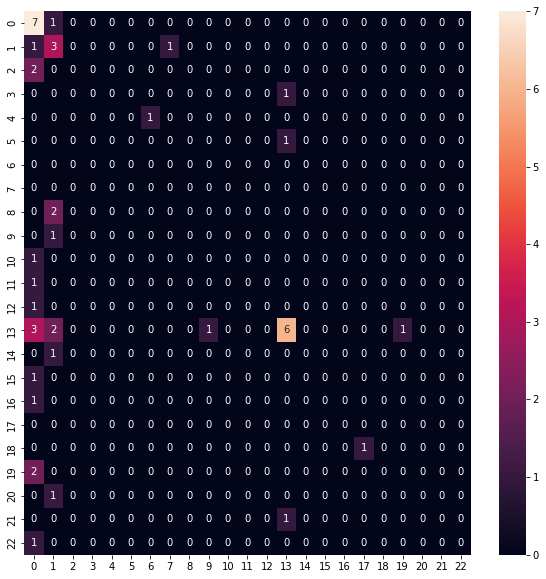

In [53]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix,annot=True, fmt='d')
plt.show()

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters=86,random_state=12)
kmeans.fit(X_train_ST,y_train)
ypred_k = kmeans.predict(X_test_ST)

In [56]:
kmeans.cluster_centers_

array([[ 9.70361638e-01, -8.76272605e-01, -1.02434730e+00,
        -4.03459353e-01, -1.06092185e+00, -1.91098799e-01,
         3.55198554e-01, -6.40444139e-01, -4.63109675e-01,
        -7.06271806e-01, -2.25527033e-01],
       [-1.26498971e+00,  5.91233425e-02,  1.16885774e+00,
         1.79751582e-01,  2.10524189e-01, -8.09416124e-01,
         1.54218727e-01,  1.19036834e+00, -7.20859518e-01,
        -9.90298824e-04,  9.44083362e-01],
       [ 3.75416690e-01, -5.61730308e-01, -1.54963285e-02,
        -4.03873743e-01,  3.81754722e-01,  5.02410226e-01,
        -1.10956644e+00,  3.96502041e-01, -6.93868327e-01,
        -6.73988995e-01,  2.60760627e-01],
       [-2.91974511e-01,  4.69472979e-01, -1.73826410e-01,
         2.57302049e+00, -1.89992244e+00,  9.78811950e-01,
         2.90148272e+00, -1.15370370e+00,  2.47848913e+00,
         3.47471443e-01,  6.38223123e-01],
       [-6.32632722e-01,  1.10862509e+00, -2.95298143e-01,
         4.83902688e-01, -6.25849883e-01, -1.20947366e-01,
  

In [57]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_ST, kmeans.labels_)

0.12207040352737199

In [58]:
df_test.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,The Black Eyed Peas,154.0,93,65.0,-3.0,45.0,74,213.0,1,10.5,72.0
1,Elton John,161.0,39,30.0,-15.0,11.0,14,292.0,26,3.0,59.0
2,Queen,64.0,46,27.0,-7.0,12.0,18,179.0,38,3.0,76.0
3,Faithless,127.0,92,71.0,-9.0,37.0,53,216.0,6,4.0,50.0
4,John Hartford,115.0,46,56.0,-12.0,21.0,34,153.0,18,3.0,44.0


In [59]:
df_test['artist'] = le.fit_transform(df_test['artist'])

In [60]:
X_new_test = normalize(df_test)

In [61]:
X_test_1 = standard_scaler.transform(X_new_test)

In [62]:
df_test_pred = svc.predict(X_test_1)

In [63]:
predicted_result = pd.DataFrame(df_test_pred).to_csv("result.csv", index = None)